In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sympy import Point, Line

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df=df.iloc[:,0:4]
scaler = StandardScaler()
df=scaler.fit_transform(df)

In [6]:
sample = df

**Elbow Implimentation with kmeans score()**  
*i.e Sum of distances of samples to their closest cluster center*

In [7]:
kmeans_score=[]
slope1=[]
sse=[]
K = range(1,10)
for k in K :
    kmeansModel1 = KMeans(n_clusters=k)
    labels=kmeansModel1.fit_predict(sample)
    centers = kmeansModel1.cluster_centers_
    #print(len(centers))
    #print(kmeansModel1.labels_)
    kmeans_score.append(kmeansModel1.score(sample))
    #print(kmeans_score)
    #sample_transformed = kmeansModel1.transform(sample)
    #print(sample_transformed)
    #Calculate slope of each line
    if k>1:
        s= (kmeans_score[-2]-kmeans_score[-1])
        slope1.append([k,s])

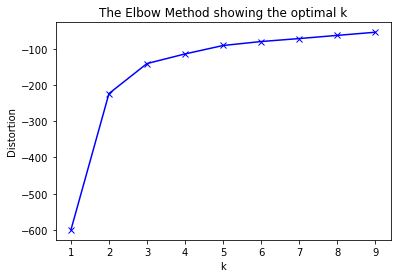

In [8]:
plt.plot(K,kmeans_score,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
print(kmeans_score)

[-600.0, -223.73200573676343, -140.96581663074699, -114.4297077708223, -91.1537282143895, -80.23060704506955, -72.00548943432355, -63.2463329463121, -54.580643493379014]


In [10]:
slope1

[[2, -376.2679942632366],
 [3, -82.76618910601644],
 [4, -26.53610885992468],
 [5, -23.2759795564328],
 [6, -10.923121169319955],
 [7, -8.225117610745997],
 [8, -8.759156488011449],
 [9, -8.665689452933087]]

In [11]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope1[a])[-1] - (slope1[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope1[a][0])-1))

Optimal Number of Clusters = 6


In [12]:
distances=[]
for i in range(0,9):
    p1=Point(1,kmeans_score[0])
    p2=Point(9,kmeans_score[8])
    l1 = Line(p1,p2)
    p=Point(i+1,kmeans_score[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+1))

Optimal number 0f clusters = 3
